**GRIP: The Sparks Foundation**

**#GRIPOCT2022**

**Task 2: Prediction Using Unsupervised Machine Learning**
 
**Problem Statement:** Prediction of optimum no. of clusters and visual representation of clusters.

**K-Means Clustering**


K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K.

Here our task is to predict optimum number of clusters and to represent clusters visually.

**Author: Phule Suraj Anandrao**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

In [2]:
# Load the iris dataset
iris= datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head() # See the first 5 rows 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for optimal K value is Elbow method

In [3]:
# Slice the important features
x=iris_data.iloc[:,:].values  # Gives array
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

The Elbow method is used to find the optimal K-value.

In the Elbow method we are actually varying the number of clusters from 1 to 10. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). 
WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS againt number of clusters, it looks like an Elbow. As the number of clusters increases, the WCSS value will start to decreases.

In [4]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

C:\Users\Suraj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Intertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and it's centroid, squaring this distance and summing these square across one cluster. A good model is one with low inertia and a low number of clusters (K).

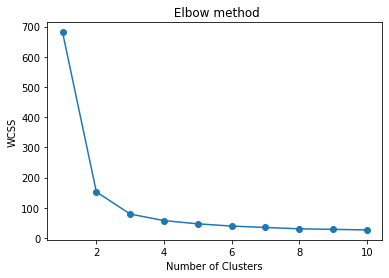

In [5]:
# Let's plot the results onto a line graph, and observe the Elbow.
plt.plot(range(1, 11), wcss,marker='o')
plt.title(' Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We can see that the Elbow on the graph above( where the inertia becomes more linear) is K=3. We can then fit our K-Means algorithm one more time and plot the different clusters assigned to the data.

In [6]:
# Applying K-means cluster to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 40)
y_Kmeans = kmeans.fit_predict(x)
print(y_Kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


y_Kmeans gives us different clusters corresponding to x.

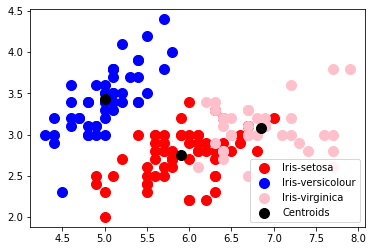

In [7]:
# Let's visualise the clusters
plt.scatter(x[y_Kmeans == 0, 0], x[y_Kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_Kmeans == 1, 0], x[y_Kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_Kmeans == 2, 0], x[y_Kmeans == 2, 1],s = 100, c = 'pink', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')

plt.legend()
plt.show()

Here we clearly seen that there are total of 3-clusters which visualised in different colors and the centroid of each cluster is visualised in black color.

**Evaluation of Cluster**

Now, The performance of the cluster is evaluated with the help of Silhouette score method.

Quality of the clusters are evaluated using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other with the help of Silhouette score method.

The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point say i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

In [8]:
from sklearn.metrics import silhouette_score
score= silhouette_score(x,y_Kmeans,metric='euclidean')
print('For given 3-clusters, Silhouette score is:',score)

For given 3-clusters, Silhouette score is: 0.5528190123564091


Silhouette score is 0.5528190123564091 which is an indication that the data points are compact within the cluster to which it belongs.

**THANK YOU**